# Clone starGAN từ github

In [1]:
!git clone https://github.com/yunjey/stargan.git
%cd stargan

Cloning into 'stargan'...
remote: Enumerating objects: 162, done.
remote: Total 162 (delta 0), reused 0 (delta 0), pack-reused 162 (from 1)
Receiving objects: 100% (162/162), 13.76 MiB | 46.19 MiB/s, done.
Resolving deltas: 100% (79/79), done.
/kaggle/working/stargan


# Tải thư viện

In [2]:
!pip install torch torchvision tensorboardx

# Train thay đổi thuộc tính khuôn mặt

In [3]:
!mkdir -p data/celeba

import os
import pandas as pd

csv_path = '/kaggle/input/celeba-dataset/list_attr_celeba.csv'
txt_dir = 'data/celeba'
txt_path = os.path.join(txt_dir, 'list_attr_celeba.txt')

os.makedirs(txt_dir, exist_ok=True)

df = pd.read_csv(csv_path)

attributes = df.columns.tolist()
attributes.remove('image_id')  # Bỏ cột 'image_id' (nếu có)

with open(txt_path, 'w') as f:
    f.write(f"{len(df)}\n")
    
    f.write(' '.join(attributes) + '\n')
    
    for index, row in df.iterrows():
        line = f"{row['image_id']} " + ' '.join(map(str, row[attributes].tolist())) + '\n'
        f.write(line)

print(f"File được lưu thành công tại: {txt_path}")

File được lưu thành công tại: data/celeba/list_attr_celeba.txt


In [4]:
""" mở logger.py sửa:
          self.writer = tf.summary.FileWriter(log_dir)
          thành
          self.writer = tf.summary.create_file_writer(log_dir)
          và
          summary = tf.Summary(value=[tf.Summary.Value(tag=tag, simple_value=value)])
          self.writer.add_summary(summary, step)
          thành
          with self.writer.as_default():
            tf.summary.scalar(tag, value, step=step)
"""

file_path = '/kaggle/working/stargan/logger.py'

try:
    with open(file_path, 'r') as f:
        content = f.read()
        print(content)  #
except FileNotFoundError:
    print(f"File không tồn tại: {file_path}")

new_content = """
import tensorflow as tf


class Logger(object):
    # Tensorboard logger.

    def __init__(self, log_dir):
        # Initialize summary writer.
        self.writer = tf.summary.create_file_writer(log_dir)

    def scalar_summary(self, tag, value, step):
        # Add scalar summary.
        with self.writer.as_default():
            tf.summary.scalar(tag, value, step=step)
"""
with open(file_path, 'w') as f:
    f.write(new_content)
print("File đã được cập nhật.")


import tensorflow as tf


class Logger(object):
    """Tensorboard logger."""

    def __init__(self, log_dir):
        """Initialize summary writer."""
        self.writer = tf.summary.FileWriter(log_dir)

    def scalar_summary(self, tag, value, step):
        """Add scalar summary."""
        summary = tf.Summary(value=[tf.Summary.Value(tag=tag, simple_value=value)])
        self.writer.add_summary(summary, step)
File đã được cập nhật.


In [5]:
!python main.py --mode train \
  --dataset CelebA \
  --image_size 156 \
  --c_dim 17 \
  --attr_path data/celeba/list_attr_celeba.txt \
  --celeba_image_dir /kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba \
  --log_dir stargan_celeba/logs \
  --model_save_dir stargan_celeba/models \
  --result_dir stargan_celeba/results \
  --sample_dir stargan_celeba/samples \
  --batch_size 16 \
  --g_lr 0.00005 \
  --d_lr 0.00005 \
  --num_iters 50000 \
  --num_iters_decay 0 \
  --sample_step 10000 \
  --model_save_step 50000 \
  --log_step 2000 \
  --selected_attrs Bald	Bangs		Black_Hair	Blond_Hair	Chubby	Eyeglasses	Goatee	Gray_Hair	Heavy_Makeup	Male	Mouth_Slightly_Open	Mustache	No_Beard	Pale_Skin		Rosy_Cheeks	Smiling	Wearing_Lipstick	


Namespace(c_dim=17, c2_dim=8, celeba_crop_size=178, rafd_crop_size=256, image_size=156, g_conv_dim=64, d_conv_dim=64, g_repeat_num=6, d_repeat_num=6, lambda_cls=1, lambda_rec=10, lambda_gp=10, dataset='CelebA', batch_size=16, num_iters=50000, num_iters_decay=0, g_lr=5e-05, d_lr=5e-05, n_critic=5, beta1=0.5, beta2=0.999, resume_iters=None, selected_attrs=['Bald', 'Bangs', 'Black_Hair', 'Blond_Hair', 'Chubby', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'No_Beard', 'Pale_Skin', 'Rosy_Cheeks', 'Smiling', 'Wearing_Lipstick'], test_iters=200000, num_workers=1, mode='train', use_tensorboard=True, celeba_image_dir='/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba', attr_path='data/celeba/list_attr_celeba.txt', rafd_image_dir='data/RaFD/train', log_dir='stargan_celeba/logs', model_save_dir='stargan_celeba/models', sample_dir='stargan_celeba/samples', result_dir='stargan_celeba/results', log_step=2000, sample_step=10000, model_sa

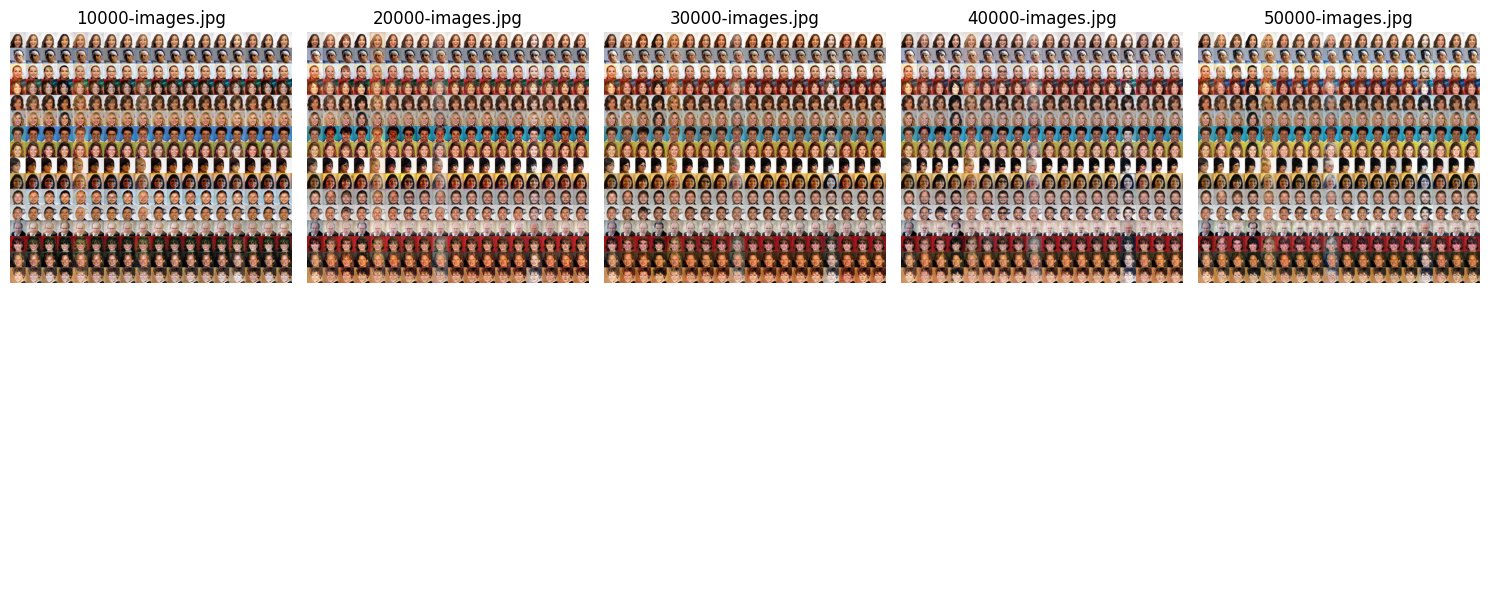

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_folder = '/kaggle/working/stargan/stargan_celeba/samples'

image_files = [f for f in os.listdir(image_folder) if f.endswith(('jpg'))]

image_files.sort()

max_images = 10
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    if i < len(image_files) and i < max_images:
        img_path = os.path.join(image_folder, image_files[i])
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(image_files[i])
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
